In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
%matplotlib inline

Necessary libraries are downloaded. 
Pandas and numpy are standard data science libraries. Sklearn is for feature selection and prediction. 
Matplotlib will be used for visualization.

In [2]:
boston= datasets.load_boston()

Boston Housing Price dataset is installed.

In [3]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

DESCR stands for description. It is used to analyze the dataset.

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Feature names is displayed. Explanation for abbreviations are listed above in description of the dataset. For example CRIM stands for per capita crime rate.

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

Dataset is converted into a pandas dataframe and stored as df.

In [6]:
df['MEDV'] = boston.target

Target variable has been assigned. 'MEDV' is Median value of owner-occupied homes. We will try to predict this feature.

In [7]:
df.shape

(506, 14)

Dataset has 14 features and 506 rows. Exploratory Data Analysis. 

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


First 5 rows of the dataset. Exploratory Data Analysis.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


Checking data types and null values of the data set. Exploratory Data Analysis.

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Mean, median, min and max values of the table. Exploratory Data Analysis. 

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no null value in the dataset, already clean. Therefore, dataset won't be subject to data cleansing.

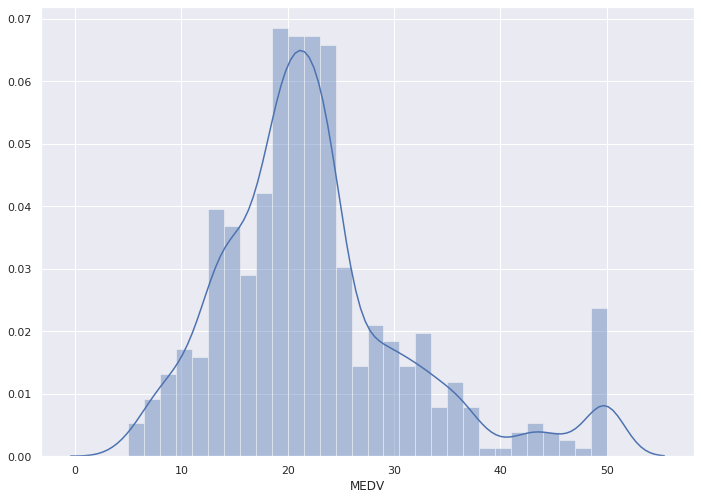

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

Target variable 'MEDV' is visualized with the help of Seaborn and Matplotlib libraries. Distribution of the vales is seen above.

In [13]:
X = df.drop("MEDV",1)   
y = df["MEDV"]     

Target variables and predictors are assigned.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Test set and training set are splitted. %20 percent of the data will be used to test.

In [15]:
RFReg=RandomForestRegressor(n_jobs=-1, random_state=42)

Regressor is created. n_jobs=-1 is used to take advantage of CPU fully. Random_state is used to get the same result if we run this model later. 

In [16]:
RFReg.fit(X_train, y_train)

/home/cihan/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Random Forest Regressor fitting implemented on training data. We can see the default values here without hyperparameter optimization.

In [17]:
y_pred_first=RFReg.predict(X_test)

prediction is implemented. while y_pred_first is the prediction without hyperparameter tuning, y_pred is the prediction with hyperparameter optimization.

In [18]:
mean_squared_error(y_test, y_pred_first)

9.055175490196076

MSE value is calculated without optimization.

In [19]:
rmse_first=mean_squared_error(y_test, y_pred_first)**0.5

rmse_first is the rmse value of our model without optimization.

In [20]:
rmse_first

3.0091818639284793

rmse_first is displayed.

In [21]:
RFReg.score(X_test, y_test)

0.8765210916447665

In [22]:
param_grid={"n_estimators":[10, 100, 500, 800],
"max_depth": [5, 8, 15, 25, 30, None],
"min_samples_leaf": [1,2,5,10] }

Hyperparameter tuning is used to optimize Random Forest Regressor. Optimized values are selected by the algorithm. I preferred gridsearch over randomsearch to get the best and a consistent accuracy. n_estimator is the number of trees in our random forest. max_depth is the max number of levels in each decision tree. min_sample_leaf is the min number of data points allowed in a leaf node. I don't optimize max_features parameter because it doesn't generate consistent values, each time algorithm chooses a different parameter. 

In [23]:
RFReg_cv= GridSearchCV(RFReg, param_grid, cv=5)

Grid Search Cross Validation is implemented. Cross validation value is chosen as 5. 

In [24]:
RfReg_cv_result = RFReg_cv.fit(X_train, y_train)

/home/cihan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Random Forest Model is implemented on training data set.

In [25]:
RfReg_cv_result.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 100}

These are the parameters chosen by algorithm n_estimators value has been changed from 10 to 100. max_depth value was none,  now is 15. min_samples_leaf value remained unchanged. 

In [26]:
y_pred=RfReg_cv_result.predict(X_test)

Prediction is implemented on test dataset after optimization.

In [27]:
mean_squared_error(y_test, y_pred)

7.927818902900492

MSE value is calculated (after hyperparameter optimization). We see that MSE value has improved after optimization.

In [28]:
rmse_second=mean_squared_error(y_test, y_pred)**0.5

Root Mean Squared Error value (after hyperparameter optimization) is also calculated. 

In [29]:
rmse_second

2.815638276288432

RMSE_second is displayed (rmse after hyperparameter optimization). RMSE has improved significantly after optimization.

In [30]:
RFReg_cv.score(X_test, y_test) 

0.8918940417192357

Accuracy score of the model on test data after hyperparameter optimization.

# FINAL REPORT

# BOSTON HOUSING DATASET

This data was originally a part of UCI (University of California Irvine) Machine Learning Repository and has been removed now.  There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features. Detailed explanation of features can be seen right below as I implemented in the first place by calling descr attribute after installing our dataset.


CRIM: Per capita crime rate by town <br>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft <br>
INDUS: Proportion of non-retail business acres per town <br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) <br>
NOX: Nitric oxide concentration (parts per 10 million) <br>
RM: Average number of rooms per dwelling <br>
AGE: Proportion of owner-occupied units built prior to 1940 <br>
DIS: Weighted distances to five Boston employment centers <br>
RAD: Index of accessibility to radial highways <br>
TAX: Full-value property tax rate per 10,000 dollars <br>
PTRATIO: Pupil-teacher ratio by town <br>
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town <br>
LSTAT: Percentage of lower status of the population <br>
MEDV: Median value of owner-occupied homes in  1000 dollars <br>

# RANDOM FOREST REGRESSION

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement. I used Random Forest method for regression in this particular case.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 

First I pass the features and the dependent variable values of the data set, to the method created for the random forest regression model. I then use the grid search cross validation method from the sklearn library to determine the optimal values to be used for the hyperparameters of our model from a specified range of values. Here, I have chosen the three hyperparameters; max_depth, min_samples_leaf and n_estimators, to be optimized. max_depth refers to the maximum depth of the tree and n_estimators, the number of trees in the forest and min_sample_leaf is the min number of data points allowed in a leaf node. Ideally, we can expect a better performance from your model when there are more trees. However, we must be cautious of the value ranges you specify and experiment using different values to see how your model performs.


# HYPERPARAMETER OPTIMIZATION

The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance, just as we try a single different ingredient for same recipe each time while cooking. While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training. In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training). Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.

# OTHER OPTIMIZATION METHODS

I preferred gridsearch optimization over random search optimization. Although implementing grid search takes way longer than randomized search, it gives us the best accuracy score and same accuracy score consistently. Randomized search doesn't guarantee us the same parameters to use each time, it comes with the risk of getting different results each and every implementation. 

Feature Selection algorithms were not helpful in this particular case as they reduced the accuracy score and I thought it is best not to use them here. Implementing feature selection algorithms during optimization by using max_features parameter produces inconsistent results. It might stem from sklearn or implementation misconceptions. Therefore I preferred going without it . 


# RESULT

In the first place, accuracy is found as 0.876, then we implement optimization, accuracy score increases to 0.891.
Optimization shows us that increasing the number of trees helps us to increase the accuracy score till our model reaches the optimization. Even though we try options like 500 trees, 800 trees during the tuning, optimization algorithm showes us 100 trees are most optimized number for our random forest in this particular case.

